## [PP190] Introduction to Table Manipulation (Take Home Exercise)
### Professor Anibel Ferus-Comelo

***

### Learning Outcomes

* Estimated time: 30 minutes

***

### Table of Contents
* Introducing the Dataset
* Exploring the Data
* Data Science Opportunities 

***

In [61]:
# importing the required modules

from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Data Science Resources

Here are some resources you can check out to explore table manipulaltion further!

- [DATA 8 Textbook](https://inferentialthinking.com/chapters/06/Tables.html)
- [Reference Sheet for the datascience Module](http://data8.org/sp22/python-reference.html)
- [Documentation for the datascience Modules](http://data8.org/datascience/index.html)
- [Statistica: Find Data on Interesting Topics](https://www.statista.com/)
- [Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis)

In [62]:
# to find the file path

#import os
#cwd = os.getcwd()  # Get the current working directory (cwd)
#files = os.listdir(cwd)  # Get all the files in that directory
#print("Files in %r: %s" % (cwd, files))

## Introducing the Dataset

The dataset comes from the US Bureau of Labor Statistics' Occupational Employment and Wage Statistics from May 2021. The May 2021 OEWS estimates are based on the 2018 Standard Occupational Classification (SOC) system and the Office of Management and Budget's revised metropolitan area definitions, based on the results of the 2010 decennial census 

The data was collected from employers of every size, state, metropolitan/nonmetropolitan areas, and all industry sectors. However, self-employed people are not included in these surveys.

This data dictionary goes over what the column names mean in the data we are about to load.

| Column       | Column Description |
| ----------- | -----------       |
| area_title  | area name         |
| area_type   | 1= US, 2= State, 3= US Territory, 4= MSA/NECTA, 5= NonMetro|
| i_group     | industry level    |
| own_code    | 1= Fed Gov, 2= State Gov, 3= Local Gov, 123= Fed/State/Local, 235= Private/State/Local, 35= Private/Local, 5= Private, 57/58/59= Other, 1235= Federal/State/Local/Private Sector               |
| occ_code    | 6-digit SOC code for the occupation|
| occ_title    | SOC title or OEWS-specific title for the occupation|
| o_group     | occupation level               |
| tot_emp     | estimated total employment (rounded; excludes self-employed)|
| emp_prse    | percent relative standard error for employment estimate               |
| jobs_1000   | the number of jobs in the given occupation per 1,000 (only for state and MSA estimates) |
| loc_quotient     | the ratio of an occupation's share of employment in a given area to the US as a whole|
| pct_total     | percent of industry in the given occupation (national industry only)|
| h_mean     | mean hourly wage               |
| a_mean     | mean annual wage               |
| mean_prse     | percent relative standard error for the mean wage estimate|

***

In [63]:
#Reading in the Data
occupation_employ_wages = Table.read_table('Data/May2021Data.csv')
occupation_employ_wages.show(10)

AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,PCT_TOTAL,PCT_RPT,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,"1,928,110",0.0,1000.000,1.00,nan,nan,23.13,"48,110",0.2,8.96,11.89,17.91,28.68,39.79,"18,630","24,720","37,250","59,660","82,760",nan,nan
1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,"96,070",1.3,49.827,0.79,nan,nan,51.06,"106,210",0.6,22.55,30.19,45.51,61.25,87.58,"46,900","62,790","94,650","127,400","182,160",nan,nan
1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,detailed,690,11.4,0.359,0.25,nan,nan,72.24,"150,260",4.8,28.46,45.36,61.14,82.09,#,"59,190","94,360","127,170","170,750",#,nan,nan
1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,detailed,"34,370",2.7,17.824,0.84,nan,nan,54.50,"113,350",0.9,22.22,29.93,46.28,68.75,#,"46,220","62,260","96,270","143,000",#,nan,nan
1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1031,Legislators,detailed,"1,030",10.0,0.535,1.69,nan,nan,*,"28,520",4.5,*,*,*,*,*,"16,930","17,310","17,840","31,300","56,420",1,nan
1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-2011,Advertising and Promotions Managers,detailed,30,21.2,0.016,0.10,nan,nan,53.01,"110,250",6.8,23.57,36.22,47.59,72.17,77.94,"49,020","75,330","98,980","150,100","162,110",nan,nan
1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-2021,Marketing Managers,detailed,"1,210",5.4,0.625,0.32,nan,nan,58.83,"122,370",2.2,29.21,37.39,49.60,75.43,99.92,"60,750","77,770","103,170","156,880","207,820",nan,nan
1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-2022,Sales Managers,detailed,"3,550",5.0,1.839,0.57,nan,nan,58.87,"122,440",3.9,28.57,37.25,49.31,73.69,#,"59,420","77,490","102,570","153,270",#,nan,nan
1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-2032,Public Relations Managers,detailed,370,5.9,0.194,0.46,nan,nan,48.69,"101,270",2.6,22.67,29.04,45.39,61.17,80.65,"47,160","60,400","94,410","127,240","167,750",nan,nan
1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-2033,Fundraising Managers,detailed,160,10.6,0.081,0.49,nan,nan,37.68,"78,370",3.9,18.36,27.92,35.90,47.27,53.59,"38,200","58,080","74,680","98,330","111,460",nan,nan


### Cleaning the Data

Before we start our analysis, our table looks like it has plenty of information we do not need. In this next section, we will be cleaning our dataset to best fit our needs. This will consist of **selecting** what columns and rows we would like to explore, **removing** rows that we cannot utilize and **changing** the types of the values in our table to make it easier to work with. As a reminder of what we learned in class, below are two methods that may come in useful during this portion of the notebook.

- Table.select("column_1", "column_2", ...)  
    - makes a new table with all the selected columns from the original table  
- Table.drop("column_1", "column_2", ...)  
    - creates a new table without all the selected columns from the original table
- Table.where("column_or_label", value_or_predicate)
    - returns a new Table containing rows where the value_or_predicate returns True for values in column_or_label

Run the cell below to select the most relevant columns on the table. Here we use the first function `select` in our first step in cleaning the data. 

In [64]:
# using the first method to create a new clean Table
new_occ_wages = occupation_employ_wages.select("AREA_TITLE", "AREA_TYPE", "I_GROUP", "OWN_CODE", "OCC_CODE", "OCC_TITLE", "O_GROUP", "TOT_EMP", "EMP_PRSE", "JOBS_1000", "LOC_QUOTIENT", "PCT_TOTAL", "H_MEAN", "A_MEAN", "MEAN_PRSE")
new_occ_wages.show(5)

AREA_TITLE,AREA_TYPE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,PCT_TOTAL,H_MEAN,A_MEAN,MEAN_PRSE
Alabama,2,cross-industry,1235,00-0000,All Occupations,total,"1,928,110",0.0,1000.000,1.00,nan,23.13,"48,110",0.2
Alabama,2,cross-industry,1235,11-0000,Management Occupations,major,"96,070",1.3,49.827,0.79,nan,51.06,"106,210",0.6
Alabama,2,cross-industry,1235,11-1011,Chief Executives,detailed,690,11.4,0.359,0.25,nan,72.24,"150,260",4.8
Alabama,2,cross-industry,1235,11-1021,General and Operations Managers,detailed,"34,370",2.7,17.824,0.84,nan,54.50,"113,350",0.9
Alabama,2,cross-industry,1235,11-1031,Legislators,detailed,"1,030",10.0,0.535,1.69,nan,*,"28,520",4.5


#### Quick Exercise: Cleaning the Data

What column do you see from the original table "occupation_employ_wages" that looks irrelevant?  

*A column from the original table that looks irrelevant is ...*

In [65]:
# lets drop that column below 
# hint: Table.drop("column_name")



As you may have noticed, the dataset contains information on all states in the America. In this notebook, we want to look at occupational employment and wage statistics strictly in the state of **California**. 

**Question 1:** First, let's relabel the `I_GROUP` column to `Industry` to make it more informative.

In [66]:
new_occ_wages = new_occ_wages.relabeled('I_GROUP', 'Industry')
new_occ_wages.show(5)

AREA_TITLE,AREA_TYPE,Industry,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,PCT_TOTAL,H_MEAN,A_MEAN,MEAN_PRSE
Alabama,2,cross-industry,1235,00-0000,All Occupations,total,"1,928,110",0.0,1000.000,1.00,nan,23.13,"48,110",0.2
Alabama,2,cross-industry,1235,11-0000,Management Occupations,major,"96,070",1.3,49.827,0.79,nan,51.06,"106,210",0.6
Alabama,2,cross-industry,1235,11-1011,Chief Executives,detailed,690,11.4,0.359,0.25,nan,72.24,"150,260",4.8
Alabama,2,cross-industry,1235,11-1021,General and Operations Managers,detailed,"34,370",2.7,17.824,0.84,nan,54.50,"113,350",0.9
Alabama,2,cross-industry,1235,11-1031,Legislators,detailed,"1,030",10.0,0.535,1.69,nan,*,"28,520",4.5


**Question 2:** In the cell below, fill in the blank to ensure that we keep data representing California only.

In [67]:
# keeping areas that are only in California 
cali = new_occ_wages.where("AREA_TITLE", "California")
cali.show(5)

AREA_TITLE,AREA_TYPE,Industry,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,PCT_TOTAL,H_MEAN,A_MEAN,MEAN_PRSE
California,2,cross-industry,1235,00-0000,All Occupations,total,"16,529,810",0.0,1000.000,1.00,nan,32.94,"68,510",0.2
California,2,cross-industry,1235,11-0000,Management Occupations,major,"1,199,620",0.7,72.573,1.15,nan,68.00,"141,440",0.5
California,2,cross-industry,1235,11-1011,Chief Executives,detailed,"33,930",5.1,2.053,1.44,nan,110.93,"230,730",2.7
California,2,cross-industry,1235,11-1021,General and Operations Managers,detailed,"286,030",1.2,17.304,0.82,nan,63.02,"131,080",0.7
California,2,cross-industry,1235,11-1031,Legislators,detailed,"2,330",5.5,0.141,0.44,nan,*,"72,740",2.9


#### Removing Nonnumeric Values

While looking at the table, you also may have noticed that there are nonnumeric values in columns that have numeric values (See column `H_MEAN`). When computing values such as the mean of a column, we want to get rid of nonnumeric numbers that can interfere with the computation such as * or # that may be used as temporary values.      

**Question 3:** In the cell below, use the 2to drop any rows that contain `*` or `#` in the `H_MEAN` column. 

*Hint: use are.not_equal_to("character")*

In [68]:
# using the cali Table, we are getting rid of the two nonnumeric values * and #
# now, we have a cali_updated table that we can use to make computations

cali_updated = cali.where("H_MEAN", are.not_equal_to("*"))
cali_updated = cali_updated.where("H_MEAN", are.not_equal_to("#"))
cali_updated.show(5)

AREA_TITLE,AREA_TYPE,Industry,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,PCT_TOTAL,H_MEAN,A_MEAN,MEAN_PRSE
California,2,cross-industry,1235,00-0000,All Occupations,total,"16,529,810",0.0,1000.000,1.00,nan,32.94,"68,510",0.2
California,2,cross-industry,1235,11-0000,Management Occupations,major,"1,199,620",0.7,72.573,1.15,nan,68.00,"141,440",0.5
California,2,cross-industry,1235,11-1011,Chief Executives,detailed,"33,930",5.1,2.053,1.44,nan,110.93,"230,730",2.7
California,2,cross-industry,1235,11-1021,General and Operations Managers,detailed,"286,030",1.2,17.304,0.82,nan,63.02,"131,080",0.7
California,2,cross-industry,1235,11-2011,Advertising and Promotions Managers,detailed,"3,750",13.4,0.227,1.42,nan,73.31,"152,490",3.8


#### Changing the Type of a Column

Sometimes, the type of a column may not be what we want. For instance, we cannot compute the mean of string values, so we would need to convert the type of the column to a float or int. 

First, let's see what the Object type the values of the H_MEAN (hourly wage) column is. 

In [69]:
temp_type = type(cali_updated.column("H_MEAN")[1])
temp_type

numpy.str_

The type of the values in the H_MEAN column are strings instead of floats. That means we will get an error when trying to compute the value of the column. 

**Question 4:** In the cell below, update the `H_MEAN` column values by changing their type into a float. Float objects represent real numbers and is written with a decimal point.

*Hint: Table["column_name"] = Table["column_name"].astype(float)*

In [70]:
cali_updated["H_MEAN"] = cali_updated["H_MEAN"].astype(float) # answer
cali_updated["H_MEAN"][0:10]

array([ 32.94,  68.  , 110.93,  63.02,  73.31,  84.21,  69.27,  68.61,
        62.97,  55.43])

Now that our data is cleaned, let's explore our new table!  

#### Mean of a Column

Table.mean
- Getting the mean value of a column  

Let's say we want to get the mean hourly wage value for California. We already have our California dataset that has removed all the nonnumeric values in the H_MEAN column and changed the types to a float.

#### Exercise 2: Compute the mean hourly wage for California

In [71]:
# hint: np.mean()

np.mean(cali_updated.column("H_MEAN")) # answer

35.66315584415585

#### Exercise 3: Find out which occupation title gets paid the most in California

In [72]:
# # see who in California gets paid the most in an occupation title
# using the OCC_TITLE and A_MEAN columns
# hint: Table.groups(["...", "..."], method)

occ_title_wage = cali_updated.groups(["OCC_TITLE", "A_MEAN"], sum) # answer
occ_title_wage

OCC_TITLE,A_MEAN,AREA_TITLE sum,AREA_TYPE sum,Industry sum,OWN_CODE sum,OCC_CODE sum,O_GROUP sum,TOT_EMP sum,EMP_PRSE sum,JOBS_1000 sum,LOC_QUOTIENT sum,PCT_TOTAL sum,H_MEAN sum,MEAN_PRSE sum
Accountants and Auditors,"92,840",,2,,1235,,,,,,,nan,44.63,
Actors,*,,2,,1235,,,,,,,nan,38.43,
Actuaries,"116,540",,2,,1235,,,,,,,nan,56.03,
Acupuncturists,"76,180",,2,,1235,,,,,,,nan,36.63,
Adhesive Bonding Machine Operators and Tenders,"43,410",,2,,1235,,,,,,,nan,20.87,
"Administrative Law Judges, Adjudicators, and Hearing Off ...","133,980",,2,,1235,,,,,,,nan,64.42,
Administrative Services Managers,"115,290",,2,,1235,,,,,,,nan,55.43,
"Adult Basic Education, Adult Secondary Education, and En ...","85,060",,2,,1235,,,,,,,nan,40.9,
Advertising Sales Agents,"76,090",,2,,1235,,,,,,,nan,36.58,
Advertising and Promotions Managers,"152,490",,2,,1235,,,,,,,nan,73.31,


In [73]:
# we only want the first two columns
# using Table.select(), create a new table to show only the first two columns

occ_title_wage = occ_title_wage.select("OCC_TITLE", "A_MEAN") # answer
occ_title_wage

OCC_TITLE,A_MEAN
Accountants and Auditors,"92,840"
Actors,*
Actuaries,"116,540"
Acupuncturists,"76,180"
Adhesive Bonding Machine Operators and Tenders,"43,410"
"Administrative Law Judges, Adjudicators, and Hearing Off ...","133,980"
Administrative Services Managers,"115,290"
"Adult Basic Education, Adult Secondary Education, and En ...","85,060"
Advertising Sales Agents,"76,090"
Advertising and Promotions Managers,"152,490"


In [74]:
# lets use the sort method to organize the annual mean wages in order from highest pay to lowest pay
# hint: Table.sort()
# hint: use the descending argument in the sort method 

occ_title_wage.sort("A_MEAN", descending=False) # answer 

OCC_TITLE,A_MEAN
Actors,*
Dancers,*
"Disc Jockeys, Except Radio",*
"Entertainers and Performers, Sports and Related Workers, ...",*
Musicians and Singers,*
Microbiologists,"100,030"
Boilermakers,"100,310"
Technical Writers,"100,730"
"Architects, Except Landscape and Naval","100,790"
Forest Fire Inspectors and Prevention Specialists,"100,800"


*insert answer here:*

From the table above, we can see that the Microbiologists occupation title has the highest annual wage in California. 

In [75]:
# don't worry about this code chunk here
# we want to get rid of the commas in the string values to use the column values as numeric values

array = cali_updated["TOT_EMP"]
new_array = []

for i in array:
    i = i.replace(",","")
    new_array.append(i)

cali_updated["TOT_EMP"] = new_array
cali_updated = cali_updated.where("TOT_EMP", are.not_equal_to("**"))

#### Exercise 4: Correlation between Total Employment and Jobs per 1000

Let's see if there is a specific group that might have positive/negative correlations.

In [76]:
# first, we need to check to see what the type of the two columns are

tot_emp = type(cali_updated.column("TOT_EMP")[1]) 
jobs_1000 = type(cali_updated.column("JOBS_1000")[1])

tot_emp, jobs_1000 # answer

(numpy.str_, numpy.str_)

In [77]:
# convert both column values to floats

cali_updated["TOT_EMP"] = cali_updated["TOT_EMP"].astype(float) # answer
cali_updated["JOBS_1000"] = cali_updated["JOBS_1000"].astype(float) # answer

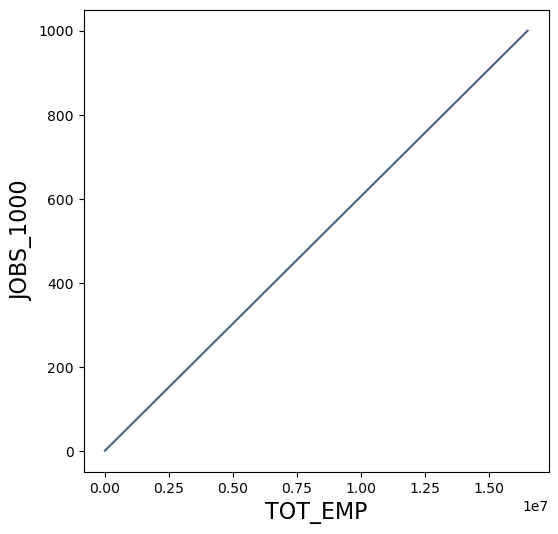

In [78]:
# plot a graph to see if there is a correlation

#pyplot.scatter(cali_updated["TOT_EMP"], cali_updated["JOBS_1000"]) 

cali_updated.plot("TOT_EMP", "JOBS_1000")

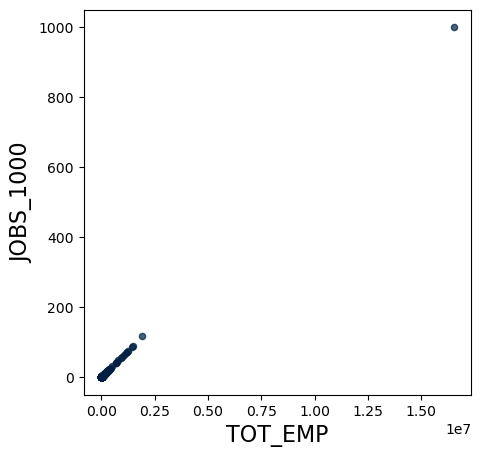

In [79]:
cali_updated.scatter("TOT_EMP", "JOBS_1000")

As expected, it seems as though there is a positive correlation between the Total Employment and Jobs per 1000.

#### Exercise 5: Find out the average number of employees for each unique combination of occupation level, `O_GROUP`, and occupation title, `OCC_TITLE`.

*Hint:* Please consider using `pivot`.

In [80]:
avg_emp = cali_updated.pivot('OCC_TITLE', 'O_GROUP', 'TOT_EMP', np.average)
avg_emp

O_GROUP,Accountants and Auditors,Actuaries,Acupuncturists,Adhesive Bonding Machine Operators and Tenders,"Administrative Law Judges, Adjudicators, and Hearing Officers",Administrative Services Managers,"Adult Basic Education, Adult Secondary Education, and English as a Second Language Instructors",Advertising Sales Agents,Advertising and Promotions Managers,Aerospace Engineering and Operations Technologists and Technicians,Aerospace Engineers,"Agents and Business Managers of Artists, Performers, and Athletes",Agricultural Equipment Operators,Agricultural Inspectors,Agricultural Technicians,"Agricultural Workers, All Other",Air Traffic Controllers,Aircraft Cargo Handling Supervisors,Aircraft Mechanics and Service Technicians,Aircraft Service Attendants,"Aircraft Structure, Surfaces, Rigging, and Systems Assemblers",Airfield Operations Specialists,All Occupations,"Ambulance Drivers and Attendants, Except Emergency Medical Technicians",Amusement and Recreation Attendants,Anesthesiologists,Animal Breeders,Animal Caretakers,Animal Control Workers,Animal Trainers,Anthropologists and Archeologists,"Architects, Except Landscape and Naval",Architectural and Civil Drafters,Architectural and Engineering Managers,Architecture and Engineering Occupations,Archivists,Art Directors,"Artists and Related Workers, All Other","Arts, Design, Entertainment, Sports, and Media Occupations",Atmospheric and Space Scientists,Audio and Video Technicians,Audiologists,Audiovisual Equipment Installers and Repairers,Automotive Body and Related Repairers,Automotive Glass Installers and Repairers,Automotive Service Technicians and Mechanics,Automotive and Watercraft Service Attendants,Avionics Technicians,Baggage Porters and Bellhops,Bakers,Barbers,Bartenders,Bicycle Repairers,Bill and Account Collectors,Billing and Posting Clerks,Biochemists and Biophysicists,Bioengineers and Biomedical Engineers,"Biological Scientists, All Other",Biological Technicians,Boilermakers,"Bookkeeping, Accounting, and Auditing Clerks",Brickmasons and Blockmasons,Bridge and Lock Tenders,Broadcast Announcers and Radio Disc Jockeys,Broadcast Technicians,Brokerage Clerks,Budget Analysts,"Building Cleaning Workers, All Other",Building and Grounds Cleaning and Maintenance Occupations,"Bus Drivers, School","Bus Drivers, Transit and Intercity",Bus and Truck Mechanics and Diesel Engine Specialists,"Business Operations Specialists, All Other",Business and Financial Operations Occupations,Butchers and Meat Cutters,Buyers and Purchasing Agents,Cabinetmakers and Bench Carpenters,Calibration Technologists and Technicians,"Camera Operators, Television, Video, and Film","Captains, Mates, and Pilots of Water Vessels",Cardiologists,Cardiovascular Technologists and Technicians,"Career/Technical Education Teachers, Postsecondary",Cargo and Freight Agents,Carpenters,Carpet Installers,Cartographers and Photogrammetrists,Cashiers,Cement Masons and Concrete Finishers,Chefs and Head Cooks,Chemical Engineers,Chemical Equipment Operators and Tenders,Chemical Technicians,Chemists,Chief Executives,"Child, Family, and School Social Workers",Childcare Workers,Chiropractors,Choreographers,Civil Engineering Technologists and Technicians,Civil Engineers,"Claims Adjusters, Examiners, and Investigators",Cleaners of Vehicles and Equipment,"Cleaning, Washing, and Metal Pickling Equipment Operators and Tenders",Clergy,Clinical Laboratory Technologists and Technicians,Clinical and Counseling Psychologists,"Coating, Painting, and Spraying Machine Setters, Operators, and Tenders","Coil Winders, Tapers, and Finishers","Coin, Vending, and Amusement Machine Servicers and Repairers",Commercial and Industrial Designers,Community Health Workers,Community and Social Service Occupations,"Community and Social Service Specialists, All Other",Compensation and Benefits Managers,"Compensation, Benefits, and Job Analysis Specialists",Compliance Officers,Computer Hardware Engineers,Computer Network Architects,Computer Network Support Spe

#### More Exploration
Great! We have went over most of baisc data manipulation functions! Now, lastly, let's look at `where` function with more specified features and also `take` function.

If you face any difficulties, please check out [this section of the data8 text book](https://inferentialthinking.com/chapters/06/2/Selecting_Rows.html) or the reference sheet in the beginning of this notebook

First, let's look at the data that we cleaned in questions before.

In [81]:
cali_updated.show(5)

AREA_TITLE,AREA_TYPE,Industry,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,PCT_TOTAL,H_MEAN,A_MEAN,MEAN_PRSE
California,2,cross-industry,1235,00-0000,All Occupations,total,1.65298e+07,0.0,1000,1.00,nan,32.94,"68,510",0.2
California,2,cross-industry,1235,11-0000,Management Occupations,major,1.19962e+06,0.7,72.573,1.15,nan,68,"141,440",0.5
California,2,cross-industry,1235,11-1011,Chief Executives,detailed,33930,5.1,2.053,1.44,nan,110.93,"230,730",2.7
California,2,cross-industry,1235,11-1021,General and Operations Managers,detailed,286030,1.2,17.304,0.82,nan,63.02,"131,080",0.7
California,2,cross-industry,1235,11-2011,Advertising and Promotions Managers,detailed,3750,13.4,0.227,1.42,nan,73.31,"152,490",3.8


#### Exercise 6: If the number of jobs in the given occupation per 1,000 is larger than 10, the job can be counted as common job.Try to find the mean hour wage of common jobs that has multiple titles. hint: munltiple titles means the there iis an "and" in the title.

In [101]:
#try to use where,are, and np.mean to get the answer
np.mean(cali_updated.where("OCC_TITLE",are.containing("and")).where(("JOBS_1000"),are.above(10)).column("H_MEAN"))# answer

29.11392857142857

#### Exercise 7: Now, I have to tell you a sad thing because there is one data that hasn't been cleaned and almost everything we do is inaccurate. We are now going to remove that data and recalculate  the mean hourly wage for California. Hint: look at the head 5 of the table, which row looks weird?

In [102]:
#clean the row by usiing take and then use np.mean to get the answer
np.mean(cali_updated.take(np.arange(1, 747)).column("H_MEAN")) # answer

35.149544235924935

#### Conclution
By now, you should have mastered a lot of Table Manipulation methods and can clean your own data. Next, we will introduce you to more methods for drawing graphs in the next notebook! Once this is done, you can create your own data science reports!

#### Peer Consulting

If you had trouble with any content in this notebook, Data Peer Consultants are here to help! You can view their locations and availabilites at this link: https://data.berkeley.edu/education/data-peer-consulting.

Peer Consultants are there to answer all data-related questions, whether it be about the content of this notebook, applications of data science in the world or other data science courses offered at Berkeley -- make sure to take advantage of this wonderful resource!


This brings us to the end of the notebook. Now you can try to use python table and plot skills for any table you found!

---